# Linear Regression

### 1.opimizer를 이용해서 경사하강법+손실함수로 적절한 W,b찾기
### 2.손실함수가 최소가 되는 방향으로 직접 W를 조정해 나가면서 W찾기 

1. opimizer를 이용해서 경사하강법+손실함수로 적절한 W,b찾기

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
torch.manual_seed(1)

In [7]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

In [8]:
x_train, y_train

(tensor([[1.],
         [2.],
         [3.]]),
 tensor([[1.],
         [2.],
         [3.]]))

In [9]:
#Linear Regresson은 loss가 최소가 되도록 x-y에 가장 잘 맞는 하나의 직선을 찾는 알고리즘이므로
#초기 W,b값을 설정해줘야함
#requires_grad=True : W,b변수는 학습을 통해 계속 변경된다는 의미
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
W,b

(tensor([0.], requires_grad=True), tensor([0.], requires_grad=True))

In [10]:
#hypothesis가 우리가 선정한 회귀선(가설)
#x_train에 대한 예측값
hypothesis = x_train * W + b
hypothesis

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)

In [11]:
#실제값
y_train

tensor([[1.],
        [2.],
        [3.]])

In [12]:
hypothesis-y_train

tensor([[-1.],
        [-2.],
        [-3.]], grad_fn=<SubBackward0>)

In [13]:
(hypothesis-y_train)**2

tensor([[1.],
        [4.],
        [9.]], grad_fn=<PowBackward0>)

In [14]:
#이 값이 MSE(Mean SQuared Error) 해당 손실값loss가 최소가 되도록 회귀선을 찾는작업
cost = torch.mean((hypothesis-y_train)**2)
cost

tensor(4.6667, grad_fn=<MeanBackward0>)

In [15]:
#SGD(확률적 경사하강법을 이용해서 최적의 W,b를 찾는 작업)
optimizer = optim.SGD([W,b], lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [16]:
#SGD를 통해 얻은 기울기를 0으로 초기화한다
#매 epoch마다 기울기를 0으로 초기화해줘야 되는 이유 => 미분을 통해 얻은 기울기(gradient)는 이전에 계산된 기울기 값에 누적시키기 때문에 
optimizer.zero_grad()

In [17]:
ex_W = torch.tensor(2.0, requires_grad=True)

ex_epoch = 20
for epoch in range(ex_epoch):
    z = 2*ex_W

    z.backward()

    #미분값인 gradient가 누적되므로 계속 0으로 초기화해줘야함 => 초기화 안하면, 0에 절대 가까워지지 않음
    print("W로 미분한값 = gradient :", ex_W.grad)

W로 미분한값 = gradient : tensor(2.)
W로 미분한값 = gradient : tensor(4.)
W로 미분한값 = gradient : tensor(6.)
W로 미분한값 = gradient : tensor(8.)
W로 미분한값 = gradient : tensor(10.)
W로 미분한값 = gradient : tensor(12.)
W로 미분한값 = gradient : tensor(14.)
W로 미분한값 = gradient : tensor(16.)
W로 미분한값 = gradient : tensor(18.)
W로 미분한값 = gradient : tensor(20.)
W로 미분한값 = gradient : tensor(22.)
W로 미분한값 = gradient : tensor(24.)
W로 미분한값 = gradient : tensor(26.)
W로 미분한값 = gradient : tensor(28.)
W로 미분한값 = gradient : tensor(30.)
W로 미분한값 = gradient : tensor(32.)
W로 미분한값 = gradient : tensor(34.)
W로 미분한값 = gradient : tensor(36.)
W로 미분한값 = gradient : tensor(38.)
W로 미분한값 = gradient : tensor(40.)


In [18]:
#W,b에 대한 경사(gradient)를 계산홤
#경사하강법(GD)은 최적화 알고리즘으로 비용함수(cost:여기선 MSE)를 최소화하기 위해 파라미터를 조정
#cost를 감소하는 방향으로 진행하다보면 Gradient가 0이 되는 최솟값에 도달
cost.backward()

In [19]:
#W.b를 업데이트
optimizer.step()

In [20]:
x_train = torch.FloatTensor([ [1] , [2] , [3]])
y_train = torch.FloatTensor([ [1] , [2] , [3]])

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b] , lr=0.01)

nb_epochs = 1000

for epoch in range(nb_epochs+1):
    hypothesis = x_train * W + b

    cost = torch.mean((hypothesis-y_train)**2)
    
    optimizer.zero_grad()

    cost.backward()

    optimizer.step()

    if(epoch%100==0):
       print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), b.item(), cost.item()))
       print(W.grad)

Epoch    0/1000 W: 0.093, b: 0.040 Cost: 4.666667
tensor([-9.3333])
Epoch  100/1000 W: 0.873, b: 0.289 Cost: 0.012043
tensor([-0.0307])
Epoch  200/1000 W: 0.900, b: 0.227 Cost: 0.007442
tensor([-0.0241])
Epoch  300/1000 W: 0.921, b: 0.179 Cost: 0.004598
tensor([-0.0189])
Epoch  400/1000 W: 0.938, b: 0.140 Cost: 0.002842
tensor([-0.0149])
Epoch  500/1000 W: 0.951, b: 0.110 Cost: 0.001756
tensor([-0.0117])
Epoch  600/1000 W: 0.962, b: 0.087 Cost: 0.001085
tensor([-0.0092])
Epoch  700/1000 W: 0.970, b: 0.068 Cost: 0.000670
tensor([-0.0072])
Epoch  800/1000 W: 0.976, b: 0.054 Cost: 0.000414
tensor([-0.0057])
Epoch  900/1000 W: 0.981, b: 0.042 Cost: 0.000256
tensor([-0.0045])
Epoch 1000/1000 W: 0.985, b: 0.033 Cost: 0.000158
tensor([-0.0035])


2. optimizer방식을 Linear Regression모델에 적용하기

In [21]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

In [22]:
#모델을 정의함
#init
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        return self.linear(x)

In [23]:
model = LinearRegressionModel()
model

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [24]:
hypothesis = model(x_train)
hypothesis

tensor([[0.0739],
        [0.5891],
        [1.1044]], grad_fn=<AddmmBackward0>)

In [25]:
cost = F.mse_loss(hypothesis, y_train)
cost

tensor(2.1471, grad_fn=<MseLossBackward0>)

In [26]:
list(model.parameters())

[Parameter containing:
 tensor([[0.5153]], requires_grad=True),
 Parameter containing:
 tensor([-0.4414], requires_grad=True)]

In [27]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [28]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

In [29]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

model = LinearRegressionModel()

optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(nb_epochs+1):

    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch%100 == 0:
        params = list(model.parameters())
       
        W = params[0].item()
        b = params[1].item()

        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(epoch, nb_epochs, W, b, cost.item()))

Epoch    0/1000 W: -0.101, b: 0.508 Cost: 4.630286
Epoch  100/1000 W: 0.713, b: 0.653 Cost: 0.061555
Epoch  200/1000 W: 0.774, b: 0.514 Cost: 0.038037
Epoch  300/1000 W: 0.822, b: 0.404 Cost: 0.023505
Epoch  400/1000 W: 0.860, b: 0.317 Cost: 0.014525
Epoch  500/1000 W: 0.890, b: 0.250 Cost: 0.008975
Epoch  600/1000 W: 0.914, b: 0.196 Cost: 0.005546
Epoch  700/1000 W: 0.932, b: 0.154 Cost: 0.003427
Epoch  800/1000 W: 0.947, b: 0.121 Cost: 0.002118
Epoch  900/1000 W: 0.958, b: 0.095 Cost: 0.001309
Epoch 1000/1000 W: 0.967, b: 0.075 Cost: 0.000809


2.손실함수가 최소가 되는 방향으로 직접 W를 조정해 나가면서 W찾기 

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [34]:
torch.manual_seed(1)

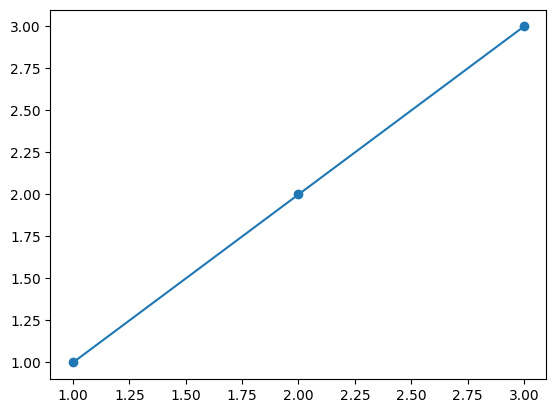

In [36]:
#주어진 x-y데이터로 우리가 찾고자 하는 기울기W=1
x_train = torch.FloatTensor([ [1] , [2] , [3] ])
y_train = torch.FloatTensor([ [1] , [2] , [3] ])

plt.scatter(x_train,y_train)
xs = np.linspace(1,3,1000)
plt.plot(xs,xs)

In [41]:
#가중치를 -5,-4,..0,1,2,3,4,...등 다양한 가중치를 설정했을 때
#이에 해당하는 예측값(hypothesis)가 나옴
#이 때 손실함수(MSE)가 나오는데, 해당 cost(MSE)는 어떤 형태를 갖는지 파악함
W_i = np.linspace(-5,7,1000)

cost_i = []

for W in W_i:
    hypothesis = W*x_train
    cost = torch.mean((hypothesis-y_train)**2)
    cost_i.append(cost)

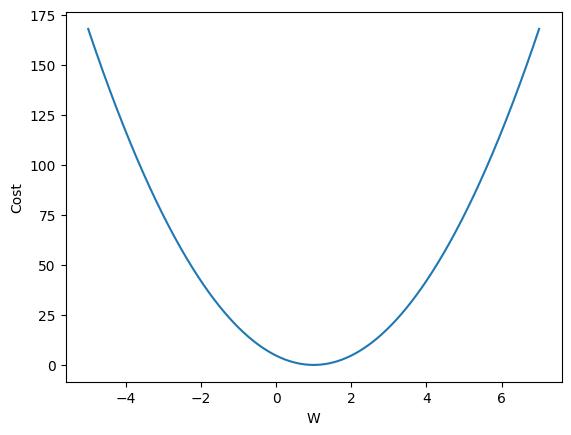

In [44]:
#W=1에 가까울수록 cost가 작아짐 
#W=1에 가까울수록 gradient=0이 됨 => cost는 x**2형태의 아래로 볼록한 이차함수이므로 
#미분했을 때 gradient가 0이 되는 cost가 최소가 됨 => 해당 W는 우리가 찾고자 하는 기울기(W)
plt.plot(W_i,cost_i)
plt.xlabel("W")
plt.ylabel("Cost")
plt.show()

In [49]:
#경사하강법 원리를 이용해서 직접 W를 수정해나가는 작업
W = torch.zeros(1)

nb_epoch = 10
lr = 0.1
for epoch in range(nb_epoch+1):
    hypothesis = x_train*W

    cost = torch.mean((hypothesis-y_train)**2)

    #cost(MSE)를 W에 대해서 미분하면, x_train이 속미분으로 밖에서 한번 더 곱해지는 형태
    gradient = torch.sum((W*x_train-y_train)*x_train)

    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), cost.item()))

    W = W - lr * gradient

Epoch    0/1000 W: 0.000, Cost: 4.666667
Epoch    1/1000 W: 1.400, Cost: 0.746666
Epoch    2/1000 W: 0.840, Cost: 0.119467
Epoch    3/1000 W: 1.064, Cost: 0.019115
Epoch    4/1000 W: 0.974, Cost: 0.003058
Epoch    5/1000 W: 1.010, Cost: 0.000489
Epoch    6/1000 W: 0.996, Cost: 0.000078
Epoch    7/1000 W: 1.002, Cost: 0.000013
Epoch    8/1000 W: 0.999, Cost: 0.000002
Epoch    9/1000 W: 1.000, Cost: 0.000000
Epoch   10/1000 W: 1.000, Cost: 0.000000


In [50]:
#경사하강법의 원리를 라이브러리에 적용해서 W를 수정해나가는 작업
W = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W], lr=0.15)

for epoch in range(nb_epoch+1):
    hypothesis = x_train*W

    cost = torch.mean((hypothesis-y_train)**2)

    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), cost.item()))

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    0/1000 W: 0.000, Cost: 4.666667
Epoch    1/1000 W: 1.400, Cost: 0.746667
Epoch    2/1000 W: 0.840, Cost: 0.119467
Epoch    3/1000 W: 1.064, Cost: 0.019115
Epoch    4/1000 W: 0.974, Cost: 0.003058
Epoch    5/1000 W: 1.010, Cost: 0.000489
Epoch    6/1000 W: 0.996, Cost: 0.000078
Epoch    7/1000 W: 1.002, Cost: 0.000013
Epoch    8/1000 W: 0.999, Cost: 0.000002
Epoch    9/1000 W: 1.000, Cost: 0.000000
Epoch   10/1000 W: 1.000, Cost: 0.000000
